In [1]:
import geopandas as gpd

resolution_choices = ["01M", "03M", "10M", "30M", "60M"]
res = resolution_choices[4]
country = "US"


world_country_borders = gpd.read_file(
        f"https://gisco-services.ec.europa.eu/distribution/v2/countries/geojson/CNTR_RG_{res}_2020_4326.geojson")
country_border = world_country_borders[world_country_borders["CNTR_ID"] == country]


<Axes: >

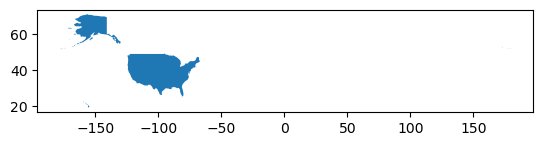

In [3]:
country_border.plot()

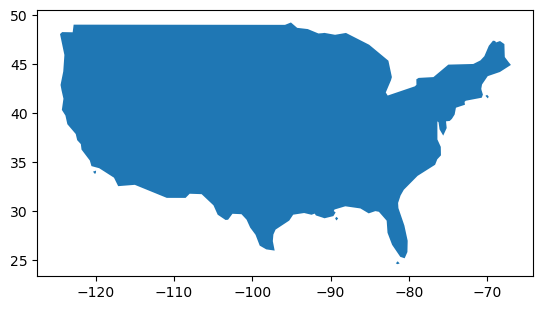

In [2]:
# Clip US border to just CONUS 
if country == "US":
    country_border = country_border.clip_by_rect(-140,20,-50,50)
    # clip_by_rect returns a geoseries, so turning back to a GDF
    country_border = gpd.GeoDataFrame(geometry=gpd.GeoSeries(country_border))
    country_border.plot()

In [3]:
import zipfile
import requests


url = "https://data.hydrosheds.org/file/HydroBASINS/standard/hybas_na_lev03_v1c.zip"
file_name = "hybas_na_lev03_v1c.zip"


r = requests.get(url)
with open(file_name, 'wb') as outfile:
    outfile.write(r.content)

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

<Axes: >

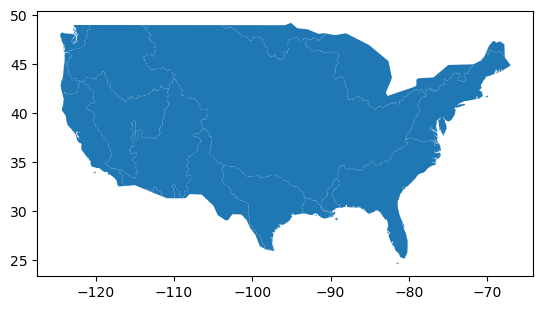

In [4]:

namerica_basin = gpd.read_file(file_name.split(".")[0]+".shp")
# print("Intersect Basin with only the wanted Country Boundary.")
country_basin = gpd.overlay(
    country_border, namerica_basin, how='intersection')
# country_basin = gpd.sjoin(country_borders, namerica_basin, )
country_basin.plot()

In [5]:
# Get Rivers
url = "https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_na_shp.zip"
file_name = "na-rivers.zip"

r = requests.get(url)
with open(file_name, 'wb') as outfile:
    outfile.write(r.content)

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import os
namerica_rivers = gpd.read_file(os.path.join("HydroRIVERS_v10_na_shp","HydroRIVERS_v10_na.shp"))


In [7]:
country_river_basin = gpd.overlay(
    namerica_rivers, country_basin, how='intersection')
country_river_basin

,HYRIV_ID,NEXT_DOWN_1,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,...,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,70282332,70284378,70045262,12.89,1478.3,33.9,57.03,160.6,0,0.289,...,0.0,0.0,1106516.8,1106516.8,712,0,0,1,8,"LINESTRING (-95.12086 49.22497, -95.12292 49.2..."
1,70282457,70284378,70045262,5.45,1478.4,11.0,21.03,21.0,0,0.034,...,0.0,0.0,1106516.8,1106516.8,712,0,0,1,8,"LINESTRING (-95.08333 49.20625, -95.08958 49.2..."
2,70283506,70279284,70045262,15.00,1438.2,106.7,54.43,2371.4,0,4.376,...,0.0,0.0,1106516.8,1106516.8,712,0,0,1,8,"LINESTRING (-94.94375 49.15208, -94.94165 49.1..."
3,70283781,70284537,70045262,7.34,1470.2,15.7,46.72,46.7,0,0.074,...,0.0,0.0,1106516.8,1106516.8,712,0,0,1,8,"LINESTRING (-95.03333 49.16667, -95.03958 49.1..."
4,70283782,70284537,70045262,10.32,1470.1,17.4,33.27,33.3,0,0.054,...,0.0,0.0,1106516.8,1106516.8,712,0,0,1,8,"LINESTRING (-94.97917 49.16667, -95.00208 49.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450743,70814169,70814304,70814840,11.57,8.1,13.5,32.80,32.8,0,0.706,...,0.0,0.0,46688.7,46688.7,743,0,1,0,20,"LINESTRING (-89.30625 29.21250, -89.30625 29.2..."
450744,70814303,70814840,70814840,6.91,6.4,9.8,18.56,18.6,0,0.399,...,0.0,0.0,46688.7,46688.7,743,0,1,0,20,"LINESTRING (-89.32292 29.16667, -89.32292 29.1..."
450745,70814304,70814840,70814840,1.69,6.6,15.0,2.63,44.8,0,0.964,...,0.0,0.0,46688.7,46688.7,743,0,1,0,20,"LINESTRING (-89.30625 29.12708, -89.31042 29.1..."
450746,70814840,0,70814840,6.31,0.0,21.3,24.57,87.7,0,1.889,...,0.0,0.0,46688.7,46688.7,743,0,1,0,20,"LINESTRING (-89.31458 29.11458, -89.31458 29.1..."


In [8]:
# 5. RIVER WIDTH
# --------------

country_river_basin['ORD_FLOW'].unique()

def assign_river_width(row):
    if row['ORD_FLOW'] == 1:
        return 0.8
    elif row['ORD_FLOW'] == 2:
        return 0.7
    elif row['ORD_FLOW'] == 3:
        return 0.6
    elif row['ORD_FLOW'] == 4:
        return 0.45
    elif row['ORD_FLOW'] == 5:
        return 0.35
    elif row['ORD_FLOW'] == 6:
        return 0.25
    elif row['ORD_FLOW'] == 7:
        return 0.2
    elif row['ORD_FLOW'] == 8:
        return 0.15
    elif row['ORD_FLOW'] == 9:
        return 0.1
    else:
        return 0


country_river_basin['width'] = country_river_basin.apply(
    assign_river_width, axis=1)


In [9]:
country_river_basin['HYBAS_ID'].unique()
len(country_river_basin['HYBAS_ID'])

450748

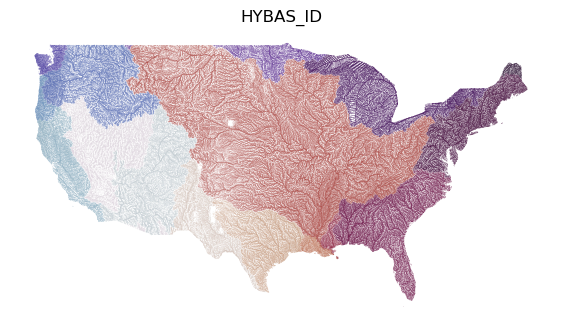

In [20]:
# 6. PLOT
# --------

from matplotlib import cm, colormaps, pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(7, 7.75))
plt.title('HYBAS_ID')
country_river_basin.plot(ax=ax, column='HYBAS_ID', cmap=colormaps['twilight'],
                         linewidth=country_river_basin['width'], 
                        #  edgecolor='black', 
                        #  alpha=country_river_basin['width'],
                         categorical=True,
                        #  legend=True
                        )
ax.set_axis_off()




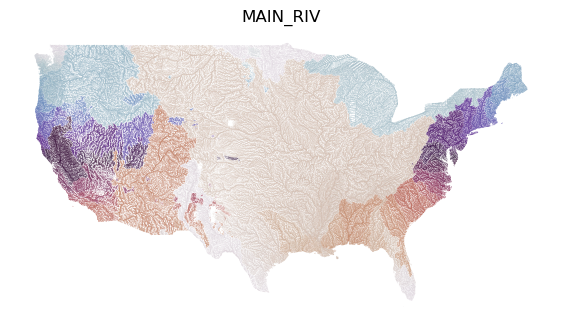

In [21]:
fig2, ax2 = plt.subplots(figsize=(7, 7.75))
plt.title('MAIN_RIV')
country_river_basin.plot(ax=ax2, column='MAIN_RIV', cmap=colormaps['twilight'],
                         linewidth=country_river_basin['width'], 
                        #  edgecolor='black', 
                        #  alpha=country_river_basin['width'],
                         categorical=True,
                        #  legend=True
                        )
ax2.set_axis_off()

In [22]:
fig.savefig('us-river-basins.png', dpi=600,
            bbox_inches='tight', pad_inches=0, transparent=True)


In [23]:
fig2.savefig('us-river-basins2.png', dpi=600,
            bbox_inches='tight', pad_inches=0, transparent=True)

In [59]:

country_river_basin.to_file("us-river-basins.geojson", driver="GeoJSON")